In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
#Extracting data

file = "/Users/admin/Downloads/Capstone_Project.csv"
capstone_data = pd.read_csv(file)

#Putting data into dataframe
df = pd.DataFrame(capstone_data)

In [4]:
df.head()

,Unnamed: 0,coy_name,employment_type,job_title,seniority,salary,salary_type,job_description,requirement,location,urls
0,0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...
2,2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"$9,000to$12,000",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...
3,3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"$5,000to$10,000",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...
4,4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"$800to$1,500",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...


In [5]:
df.columns

Index(['Unnamed: 0', 'coy_name', 'employment_type', 'job_title', 'seniority',
       'salary', 'salary_type', 'job_description', 'requirement', 'location',
       'urls'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0          int64
coy_name           object
employment_type    object
job_title          object
seniority          object
salary             object
salary_type        object
job_description    object
requirement        object
location           object
urls               object
dtype: object

In [7]:
#Dropping unnecessary columns named: Unnamed.

df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,coy_name,employment_type,job_title,seniority,salary,salary_type,job_description,requirement,location,urls
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"$9,000to$12,000",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"$5,000to$10,000",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"$800to$1,500",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...


In [9]:
#Rename columns to ensure smooth extraction

df.rename(columns = {'coy_name':'Company', 'seniority':'Job_level'}, inplace = True)

In [10]:
df.shape

(1900, 10)

In [11]:
df.isnull().sum()

Company             29
employment_type     29
job_title           29
Job_level           61
salary             226
salary_type        226
job_description     29
requirement        105
location            76
urls                 0
dtype: int64

In [12]:
df.head(2)

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...


In [13]:
#Checking for null cells in all the columns

df.isnull().sum()

Company             29
employment_type     29
job_title           29
Job_level           61
salary             226
salary_type        226
job_description     29
requirement        105
location            76
urls                 0
dtype: int64

In [14]:
#Checking for duplicates

df.duplicated().sum()

0

In [15]:
#Rows which have Salary cells that are null

df[df.salary.isnull()]

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls
12,NEWFORT HOSPITALITY MANAGEMENT,Full Time,PERFORMANCE DEVELOPMENT ANALYST,Senior Executive,NaN,NaN,The Performance Development Analyst performs t...,- Minimum 1-2 years relevant working experienc...,Central,https://www.mycareersfuture.sg/job/performance...
21,AMAZON ASIA-PACIFIC HOLDINGS PRIVATE LIMITED,Full Time,"Marketing Manager, Prime Now",Manager,NaN,NaN,"We are seeking a talented, creative, and dynam...",Basic Qualifications Bachelor’s Degree with ...,Central,https://www.mycareersfuture.sg/job/marketing-m...
24,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Product Analyst,Senior Executive,NaN,NaN,Get to know our Team: Product Analytics cares...,The must haves: atleast 4+ years experience i...,Central,https://www.mycareersfuture.sg/job/product-ana...
30,GRABTAXI HOLDINGS PTE. LTD.,Full Time,Product Analyst,Executive,NaN,NaN,Get to know our Team: Product Analytics cares...,"The must haves: Experience in Analytics, Busi...",Central,https://www.mycareersfuture.sg/job/product-ana...
47,DU PONT COMPANY (SINGAPORE) PTE. LTD.,Full Time,"Food Enzyme Application Scientist, Bakery",Senior Management,NaN,NaN,Key responsibilities include but are not limit...,Qualifications: PhD or Master’s degree in Bi...,South,https://www.mycareersfuture.sg/job/food-enzyme...
...,...,...,...,...,...,...,...,...,...,...
1843,TALENT SPOT GROUP PRIVATE LTD.,Full Time,APAC Marketing Operations Analyst,Executive,NaN,NaN,Data-driven individual with strong creative an...,Desired Skill Sets Diploma / Degree in Busi...,Islandwide,https://www.mycareersfuture.sg/job/apac-market...
1862,AD ASTRA CONSULTANTS PRIVATE LTD.,Contract,Marketing Analyst (Business Insights),Executive,NaN,NaN,Analyse impact of marketing campaigns using R ...,Ideal candidate would have: Solid experience...,South,https://www.mycareersfuture.sg/job/marketing-a...
1873,D & C (DESIGN & COMFORT) HOLDING PTE. LTD.,Full Time,E- Commerce Executive,"Fresh/entry level, Executive, Junior Executive",NaN,NaN,The E-Commerce Executive contributes to the gr...,~ Coach for service performance. ~ Manage a d...,South,https://www.mycareersfuture.sg/job/e-commerce-...
1874,ONE SEARCH CONSULTING PTE. LTD.,"Permanent, Full Time",EHS Manager,Manager,NaN,NaN,Our client is a Western MNC and manufacturer o...,Requirements Minimum of 10-15 years’ work e...,Islandwide,https://www.mycareersfuture.sg/job/ehs-manager...


In [16]:
#Percentage of rows where Salary are null

percent_salary_missing = df.salary.isnull().sum() *100 / len(df)
print(percent_salary_missing)

11.894736842105264


In [17]:
#Finding out the row index number that has salary as null

df[df.salary.isnull()].index

Int64Index([  12,   21,   24,   30,   47,   48,   53,   54,   56,   57,
            ...
            1784, 1789, 1821, 1822, 1836, 1843, 1862, 1873, 1874, 1892],
           dtype='int64', length=226)

In [18]:
#Dropping this row with null values from the dataset

df.drop(df[df.salary.isnull()].index,axis=0, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1674 non-null   object
 1   employment_type  1674 non-null   object
 2   job_title        1674 non-null   object
 3   Job_level        1671 non-null   object
 4   salary           1674 non-null   object
 5   salary_type      1674 non-null   object
 6   job_description  1674 non-null   object
 7   requirement      1637 non-null   object
 8   location         1637 non-null   object
 9   urls             1674 non-null   object
dtypes: object(10)
memory usage: 143.9+ KB


In [20]:
#Checking how many cells with nan values in the other columns

df.isnull().sum()

Company             0
employment_type     0
job_title           0
Job_level           3
salary              0
salary_type         0
job_description     0
requirement        37
location           37
urls                0
dtype: int64

In [21]:
#Dropping the remaining rows with the other Nanvalues

df.dropna(axis=0,inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1637 non-null   object
 1   employment_type  1637 non-null   object
 2   job_title        1637 non-null   object
 3   Job_level        1637 non-null   object
 4   salary           1637 non-null   object
 5   salary_type      1637 non-null   object
 6   job_description  1637 non-null   object
 7   requirement      1637 non-null   object
 8   location         1637 non-null   object
 9   urls             1637 non-null   object
dtypes: object(10)
memory usage: 140.7+ KB


In [23]:
#Checking again if there are any null values

df.isnull().sum().sum()

0

In [24]:
#See if the indexes are not ordered accordingly. As you can see we removed index 12, and it's missing.

df.head(20)

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"$9,000to$12,000",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"$5,000to$10,000",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"$800to$1,500",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,Data Analyst,"Middle Management, Executive","$4,000to$5,000",Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Senior Data Center Infrastructure Availability...,Professional,"$14,000to$17,000",Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...
7,MACLINK PTE. LTD.,Full Time,Data Processing Manager,Manager,"$2,000to$4,000",Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,Manager - Transformation and Apps,Manager,"$8,000to$10,000",Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,Software Engineer in Machine Learning,Professional,"$5,000to$7,500",Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...


In [25]:
#Resetting the index for the values removed for null

df.reset_index(drop=True,inplace=True)

In [26]:
df.head(20)

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"$5,000to$7,000",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"$2,200to$6,000",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"$9,000to$12,000",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"$5,000to$10,000",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"$800to$1,500",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,Data Analyst,"Middle Management, Executive","$4,000to$5,000",Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Senior Data Center Infrastructure Availability...,Professional,"$14,000to$17,000",Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...
7,MACLINK PTE. LTD.,Full Time,Data Processing Manager,Manager,"$2,000to$4,000",Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,Manager - Transformation and Apps,Manager,"$8,000to$10,000",Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,Software Engineer in Machine Learning,Professional,"$5,000to$7,500",Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...


In [27]:
#Checking for the types of salary

df.salary_type.unique()

array(['Monthly', 'Annually'], dtype=object)

In [28]:
df.salary[1:3]

1     $2,200to$6,000
2    $9,000to$12,000
Name: salary, dtype: object

In [29]:
df.salary[:19]

0       $5,000to$7,000
1       $2,200to$6,000
2      $9,000to$12,000
3      $5,000to$10,000
4         $800to$1,500
5       $4,000to$5,000
6     $14,000to$17,000
7       $2,000to$4,000
8      $8,000to$10,000
9       $5,000to$7,500
10      $4,500to$7,000
11      $4,500to$7,500
12     $5,000to$10,000
13     $6,000to$12,000
14      $5,000to$7,000
15      $4,500to$7,000
16      $3,000to$6,000
17      $5,000to$6,500
18      $4,500to$9,000
Name: salary, dtype: object

In [30]:
#Breaking up salary range to min and max

df.salary = df.salary.map(lambda x: str(x).replace('$','').split('to'))

In [31]:
df.salary [:20]

0       [5,000, 7,000]
1       [2,200, 6,000]
2      [9,000, 12,000]
3      [5,000, 10,000]
4         [800, 1,500]
5       [4,000, 5,000]
6     [14,000, 17,000]
7       [2,000, 4,000]
8      [8,000, 10,000]
9       [5,000, 7,500]
10      [4,500, 7,000]
11      [4,500, 7,500]
12     [5,000, 10,000]
13     [6,000, 12,000]
14      [5,000, 7,000]
15      [4,500, 7,000]
16      [3,000, 6,000]
17      [5,000, 6,500]
18      [4,500, 9,000]
19      [2,000, 4,000]
Name: salary, dtype: object

In [32]:
#Creating a minimum salary for the bottom range

df['min_salary'] = df.salary.map(lambda x: float(x[0].replace(',','')))

In [33]:
#Creating a maximum salary for the upper range

df['max_salary'] = df.salary.map(lambda x: float(x[1].replace(',','')))

In [34]:
df.head(2)

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls,min_salary,max_salary
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"[5,000, 7,000]",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"[2,200, 6,000]",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0


In [35]:
df['mean_salary'] = (df['min_salary']+df['max_salary']) / 2

In [36]:
df.head(5)

,Company,employment_type,job_title,Job_level,salary,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,"[5,000, 7,000]",Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,"[2,200, 6,000]",Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,"[9,000, 12,000]",Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,"[5,000, 10,000]",Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,"[800, 1,500]",Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0


In [37]:
#Removing the salary column as we don't need it anymore

df.drop('salary',axis=1,inplace=True)

In [38]:
df.head(5)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0


In [39]:
#Rows with annual salary instead of monthly

df[df.salary_type =='Annually'].index

Int64Index([  47,  116,  142,  159,  214,  233,  242,  251,  272,  277,  286,
             443,  489,  567,  630,  654,  661,  670,  682,  746,  774,  795,
             824,  864,  906,  909,  932,  941,  970,  973,  990,  995, 1121,
            1127, 1135, 1167, 1189, 1192, 1261, 1263, 1374, 1415, 1458, 1543,
            1576, 1586, 1608, 1628],
           dtype='int64')

In [40]:
#Rows with annual salary instead of monthly

df[df.salary_type == 'Annually']

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
47,TIGERSPIKE PTE. LTD.,Full Time,Senior UI Designer,Senior Executive,Annually,Tigerspike Singapore is looking for a Senior U...,Who are you? You have at least 6 years of pro...,Central,https://www.mycareersfuture.sg/job/senior-ui-d...,95000.0,120000.0,107500.0
116,DHL EXPRESS (SINGAPORE) PTE. LTD.,Permanent,Reporting Senior Analyst,Senior Executive,Annually,Role Purpose Be the subject matter expert in ...,Requirements University degree or equivalent ...,Central,https://www.mycareersfuture.sg/job/reporting-s...,65000.0,90000.0,77500.0
142,MOTT MACDONALD SINGAPORE PTE LIMITED,Full Time,Renewable Energy Advisor,Executive,Annually,Mott MacDonald has a long and successful track...,"For this role, you will have the following: ...",East,https://www.mycareersfuture.sg/job/renewable-e...,80000.0,90000.0,85000.0
159,APPLIED COMPLIANCE TECHNOLOGIES SG PTE. LTD.,Full Time,Chief Strategy Officer,Manager,Annually,The Chief Strategy Officer will provide strate...,"Above all, we are looking for a long term thin...",Central,https://www.mycareersfuture.sg/job/chief-strat...,100000.0,200000.0,150000.0
214,Company Undisclosed,Full Time,Enterprise Software Sales Consultant,Executive,Annually,"Founded in 2016, the Company's team of data sc...",Requirements and qualifications Proven and co...,East,https://www.mycareersfuture.sg/job/enterprise-...,50000.0,100000.0,75000.0
233,UBS AG,Full Time,Data Center Service Manager,Senior Executive,Annually,Are you passionate about Data Centres and IT? ...,- At least 5 years' experience in the manageme...,Central,https://www.mycareersfuture.sg/job/data-center...,160000.0,240000.0,200000.0
242,SPOTIFY SINGAPORE PTE. LTD.,Permanent,Data Scientist,Executive,Annually,We seek an outstanding Data Scientist to join ...,Who you are Degree in Computer Science/Engine...,Central,https://www.mycareersfuture.sg/job/data-scient...,90000.0,110000.0,100000.0
251,"TURNER BROADCASTING SALES SOUTHEAST ASIA, INC",Permanent,"Engineer, Business Intelligence",Executive,Annually,The Business Intelligence Engineer of Turner D...,Essential 1. 4+ years solid experience as a da...,Islandwide,https://www.mycareersfuture.sg/job/engineer-bu...,68040.0,83160.0,75600.0
272,NATIONAL UNIVERSITY OF SINGAPORE,Full Time,Research Associate,Non-executive,Annually,The Cardiovascular and Metabolic Disorders (CV...,Master’s Degree in Science/Life Sciences or M...,South,https://www.mycareersfuture.sg/job/research-as...,44760.0,85272.0,65016.0
277,NATIONAL UNIVERSITY OF SINGAPORE,Full Time,Research Associate (OR / CVMD / KT) - 009NS,Non-executive,Annually,The Cardiovascular and Metabolic Disorders (CV...,Master’s Degree in Science/Life Sciences or M...,South,https://www.mycareersfuture.sg/job/research-as...,44760.0,85272.0,65016.0


In [41]:
#Indexing the rows with annual salary

annual_salary = df[df.salary_type =='Annually'].index

In [42]:
#Changing the annual salary to monthly

df.iloc[annual_salary,-3:-1] = df.iloc[annual_salary,-3:-1].apply(lambda x: x/12)

df.iloc[annual_salary,-1] = df.iloc[annual_salary,-1].apply(lambda x: x/12)

In [43]:
df[df.salary_type == 'Annually'].head(5)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
47,TIGERSPIKE PTE. LTD.,Full Time,Senior UI Designer,Senior Executive,Annually,Tigerspike Singapore is looking for a Senior U...,Who are you? You have at least 6 years of pro...,Central,https://www.mycareersfuture.sg/job/senior-ui-d...,7916.666667,10000.000000,8958.333333
116,DHL EXPRESS (SINGAPORE) PTE. LTD.,Permanent,Reporting Senior Analyst,Senior Executive,Annually,Role Purpose Be the subject matter expert in ...,Requirements University degree or equivalent ...,Central,https://www.mycareersfuture.sg/job/reporting-s...,5416.666667,7500.000000,6458.333333
142,MOTT MACDONALD SINGAPORE PTE LIMITED,Full Time,Renewable Energy Advisor,Executive,Annually,Mott MacDonald has a long and successful track...,"For this role, you will have the following: ...",East,https://www.mycareersfuture.sg/job/renewable-e...,6666.666667,7500.000000,7083.333333
159,APPLIED COMPLIANCE TECHNOLOGIES SG PTE. LTD.,Full Time,Chief Strategy Officer,Manager,Annually,The Chief Strategy Officer will provide strate...,"Above all, we are looking for a long term thin...",Central,https://www.mycareersfuture.sg/job/chief-strat...,8333.333333,16666.666667,12500.000000
214,Company Undisclosed,Full Time,Enterprise Software Sales Consultant,Executive,Annually,"Founded in 2016, the Company's team of data sc...",Requirements and qualifications Proven and co...,East,https://www.mycareersfuture.sg/job/enterprise-...,4166.666667,8333.333333,6250.000000


In [44]:
#Now that we've changed all to monthly salary, we can change all to monthly

df['salary_type'] = df['salary_type'].replace('Annually', 'Monthly')

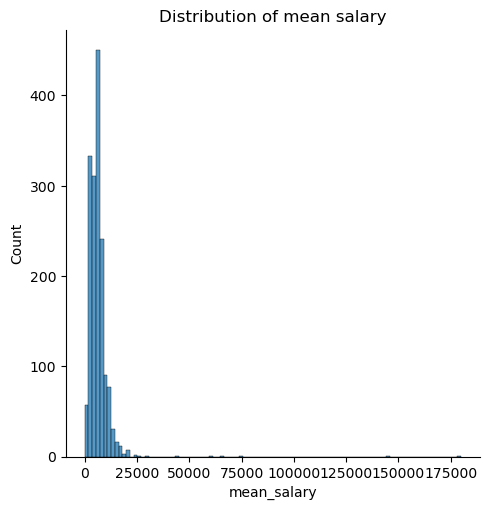

In [45]:
#Plot the distribution of average salary after cleaning

sns.displot(df, x="mean_salary", bins=100)
plt.title('Distribution of mean salary')
plt.show()

In [46]:
df['mean_salary'].describe()

count      1637.000000
mean       6526.503156
std        7036.006347
min          10.000000
25%        3750.000000
50%        6000.000000
75%        7500.000000
max      180000.000000
Name: mean_salary, dtype: float64

In [47]:
#Finding the outliers

mean = np.mean(df['mean_salary'])
std = np.std(df['mean_salary'])
df[df['mean_salary']>(mean+3*std)]

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
91,INC RESEARCH CRO SINGAPORE PTE. LTD.,"Permanent, Full Time",SR Site Start-up & Regulatory Specialist,"Professional, Senior Executive",Monthly,Performs assigned activities within the countr...,Requirements: BA/BS degree in the science/he...,Islandwide,https://www.mycareersfuture.sg/job/sr-site-sta...,70000.0,80000.000000,75000.000000
443,JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD,"Permanent, Full Time",Senior Investment Strategist,Senior Management,Monthly,"Head of Data Centre Capital Markets, APAC Alte...",Sound like you? To apply you need to be: A Dat...,Central,https://www.mycareersfuture.sg/job/senior-inve...,25000.0,33333.333333,29166.666667
704,ULTRA CLEAN ASIA PACIFIC PTE. LTD.,"Permanent, Full Time",Chief Operationg Officer,Senior Management,Monthly,Designing and implementing business operation...,Pivotal Experience & Expertise Operational ex...,North,https://www.mycareersfuture.sg/job/chief-opera...,40000.0,80000.000000,60000.000000
965,IHS MARKIT ASIA PTE. LTD.,"Permanent, Full Time","Senior Associate, Research and Analysis (Korea...",Senior Executive,Monthly,Department overview: IHS Markit’s Dividend For...,Education and experience Undergraduate degr...,Central,https://www.mycareersfuture.sg/job/senior-asso...,50000.0,80000.000000,65000.000000
1021,NCS PTE. LTD.,Permanent,Lead / Senior Database Administrator,Professional,Monthly,"Position Summary Setup, deploy and maintain s...",Minimum 3 years of experience in database adm...,North,https://www.mycareersfuture.sg/job/lead-senior...,5000.0,85000.000000,45000.000000
1249,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Senior Sales Manager,Middle Management,Monthly,The new position is available in our Singapore...,Candidates should have a backgroud in selling ...,Central,https://www.mycareersfuture.sg/job/senior-sale...,120000.0,170000.000000,145000.000000
1293,SIX FINANCIAL INFORMATION SINGAPORE PTE. LTD.,Full Time,Head of SSO (APAC),Middle Management,Monthly,The SSO group provides business support servic...,Main Duties 1. A key positive aspect of the SI...,Central,https://www.mycareersfuture.sg/job/head-sso-si...,144000.0,216000.000000,180000.000000


In [48]:
#There are 7 outliers which we will then study to see why they are outliers and if there are any errors. 
#It seems that Jobs 91, 965,1021,1249,1293 are inaccurate as the mean salary does not reflect the typical salary on the ground for that position

index2 = df[df['mean_salary']>(mean+3*std)].index
index3 = index2[[0,3,4,5,6]]
index3

Int64Index([91, 965, 1021, 1249, 1293], dtype='int64')

In [49]:
#As such, we divide the salary by 10 so that it will be better reflected the accurate salary
df.iloc[index2,-3:-1]= df.iloc[index2,-3:-1].apply(lambda x: x/10)
df.iloc[index2,-1]= df.iloc[index2,-1].apply(lambda x: x/10)

# remove 1 outlier, monthly salary = 60000
df.drop(index=704,axis=0,inplace=True)

In [50]:
df.iloc[index3]

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary
91,INC RESEARCH CRO SINGAPORE PTE. LTD.,"Permanent, Full Time",SR Site Start-up & Regulatory Specialist,"Professional, Senior Executive",Monthly,Performs assigned activities within the countr...,Requirements: BA/BS degree in the science/he...,Islandwide,https://www.mycareersfuture.sg/job/sr-site-sta...,7000.0,8000.0,7500.0
966,SMITECH ENGINEERING PTE LTD,Permanent,Accountant,Executive,Monthly,The Accountant reports to the Finance Manager ...,~ Prepare accurate and timely tax and financia...,East,https://www.mycareersfuture.sg/job/accountant-...,3500.0,4500.0,4000.0
1022,RAFFLES INSTITUTION,"Contract, Full Time",Laboratory Officer,Non-executive,Monthly,Performing house-keeping duties and ensuring ...,Strong knowledge of laboratory procedures inc...,North,https://www.mycareersfuture.sg/job/laboratory-...,1300.0,2800.0,2050.0
1250,SINGAPORE AMERICAN SCHOOL LIMITED,Contract,Elementary School Counselor,Professional,Monthly,SAS is committed to providing each student wit...,Your application will be reviewed in relation ...,North,https://www.mycareersfuture.sg/job/elementary-...,6000.0,11000.0,8500.0
1294,VISA WORLDWIDE PTE. LIMITED,"Permanent, Full Time",Staff SW Engineer,Manager,Monthly,Visa is seeking a Staff QA Automation Engineer...,Bachelor's Degree in Computer Science or rela...,East,https://www.mycareersfuture.sg/job/staff-sw-en...,9000.0,11600.0,10300.0


/var/folders/ll/h9l4cp0s3sj93kjfbhm663g00000gn/T/ipykernel_64518/546496477.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["mean_salary"])


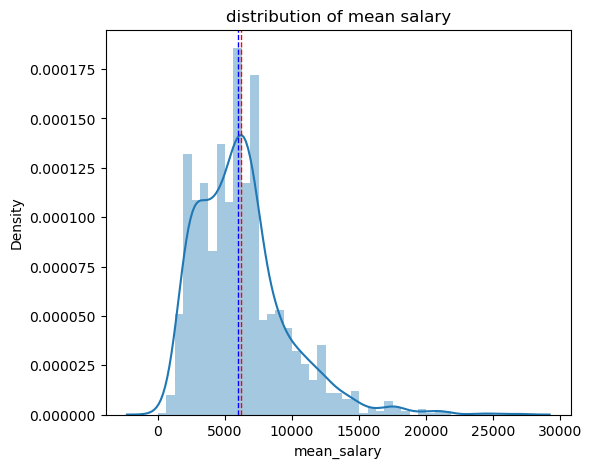

In [51]:
# plot the distribution of average salary after cleaning
plt.figure(figsize=(6,5))
sns.distplot(df["mean_salary"])
plt.title("distribution of mean salary")
plt.axvline(df["mean_salary"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df["mean_salary"].median(), color='b', linestyle='dashed', linewidth=1)
plt.show()

In [52]:
#Description of the mean salary after cleaning it

df['mean_salary'].describe()

count     1636.000000
mean      6197.210065
std       3390.829638
min         10.000000
25%       3750.000000
50%       6000.000000
75%       7500.000000
max      26900.000000
Name: mean_salary, dtype: float64

In [53]:
#Regex to extract the number of years of experience
import re
df['years_of_experience'] = df['requirement'].apply(lambda x: re.search(r'(\d+)\+?\s*years', str(x), re.IGNORECASE).group(1) if re.search(r'(\d+)\+?\s*years', str(x), re.IGNORECASE) else None)

# Convert the result to numeric
df['years_of_experience'] = pd.to_numeric(df['years_of_experience'], errors='coerce')

In [54]:
df.head(20)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,3.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,NaN
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,5.0
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,7.0
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,NaN
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,Data Analyst,"Middle Management, Executive",Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...,4000.0,5000.0,4500.0,NaN
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Senior Data Center Infrastructure Availability...,Professional,Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...,14000.0,17000.0,15500.0,10.0
7,MACLINK PTE. LTD.,Full Time,Data Processing Manager,Manager,Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...,2000.0,4000.0,3000.0,NaN
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,Manager - Transformation and Apps,Manager,Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...,8000.0,10000.0,9000.0,15.0
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,Software Engineer in Machine Learning,Professional,Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...,5000.0,7500.0,6250.0,NaN


In [55]:
df['years_of_experience'].isnull().sum()

757

In [56]:
# %  of job listings with missing years of experience

years_of_experience_missing = df.years_of_experience.isnull().sum() *100 / len(df)
print(years_of_experience_missing)

46.271393643031786


In [57]:
df.years_of_experience.describe()

count    879.000000
mean       5.197952
std        3.121962
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       45.000000
Name: years_of_experience, dtype: float64

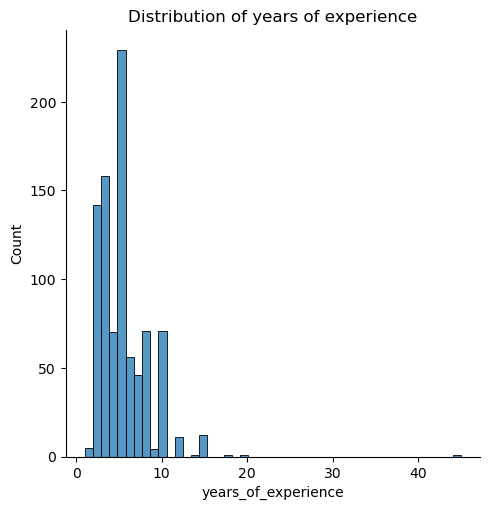

In [58]:
# plot the distribution of average salary after cleaning
sns.displot(df, x="years_of_experience", bins=46)
plt.title('Distribution of years of experience')
plt.show()

In [59]:
#Outlier, explained by the years being the age of the candidate and not the years of experience.

df[df['years_of_experience'] == 45.0]

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience
1159,HEALBEAU INTERNATIONAL PTE. LTD.,Full Time,IT SUPPORT,Professional,Monthly,Ability to work independently. Provide technic...,Hardworking and good personality. Must have pa...,North,https://www.mycareersfuture.sg/job/support-hea...,2000.0,2500.0,2250.0,45.0


In [60]:
# remove 1 outlier, where years of experience is 45.0
df.drop(index=1159,axis=0,inplace=True)

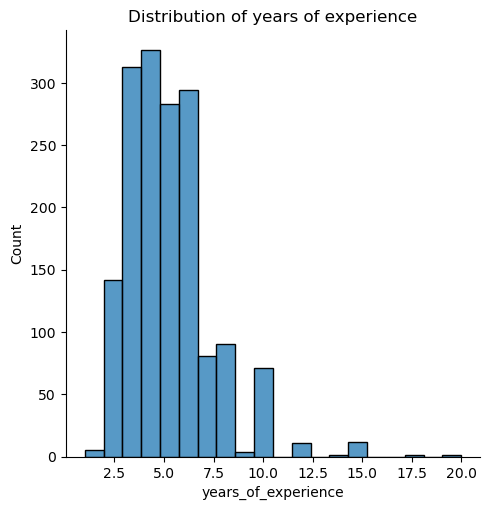

In [181]:
# plot the distribution of average salary after cleaning
sns.displot(df, x="years_of_experience", bins=20)
plt.title('Distribution of years of experience')
plt.show()

In [66]:
mean_experience_by_level = df.groupby('Job_level')['years_of_experience'].mean()

print(mean_experience_by_level)

Job_level
Executive            4.189055
Fresh/entry level    2.652174
Junior Executive     2.926829
Manager              5.927007
Middle Management    6.711111
Non-executive        3.918033
Professional         5.585253
Senior Executive     5.474138
Senior Management    8.135135
Name: years_of_experience, dtype: float64


In [67]:
# Assuming df is your DataFrame
mean_experience_by_level = df.groupby('Job_level')['years_of_experience'].transform('mean')

# Replace NaN values with the mean of the corresponding Job_level
df['years_of_experience'] = df['years_of_experience'].fillna(mean_experience_by_level)

In [68]:
df.head(20)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,3.000000
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,6.711111
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,5.000000
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,7.000000
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,2.652174
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,Data Analyst,Middle Management,Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...,4000.0,5000.0,4500.0,6.711111
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Senior Data Center Infrastructure Availability...,Professional,Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...,14000.0,17000.0,15500.0,10.000000
7,MACLINK PTE. LTD.,Full Time,Data Processing Manager,Manager,Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...,2000.0,4000.0,3000.0,5.927007
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,Manager - Transformation and Apps,Manager,Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...,8000.0,10000.0,9000.0,15.000000
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,Software Engineer in Machine Learning,Professional,Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...,5000.0,7500.0,6250.0,5.585253


In [70]:
df.years_of_experience.isnull().sum()

0

In [69]:
#Rounding up the years of experience to a whole number for easy aggregation

df['years_of_experience'] = df['years_of_experience'].round()

In [71]:
df.head(20)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Data Engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,3.0
1,PORTCAST PTE. LTD.,Full Time,Data Scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,7.0
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Data Center Engineering Project Engineer APAC,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,5.0
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,Lead Data Center Engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,7.0
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,Data Scientist - Intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,3.0
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,Data Analyst,Middle Management,Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...,4000.0,5000.0,4500.0,7.0
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,Senior Data Center Infrastructure Availability...,Professional,Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...,14000.0,17000.0,15500.0,10.0
7,MACLINK PTE. LTD.,Full Time,Data Processing Manager,Manager,Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...,2000.0,4000.0,3000.0,6.0
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,Manager - Transformation and Apps,Manager,Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...,8000.0,10000.0,9000.0,15.0
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,Software Engineer in Machine Learning,Professional,Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...,5000.0,7500.0,6250.0,6.0


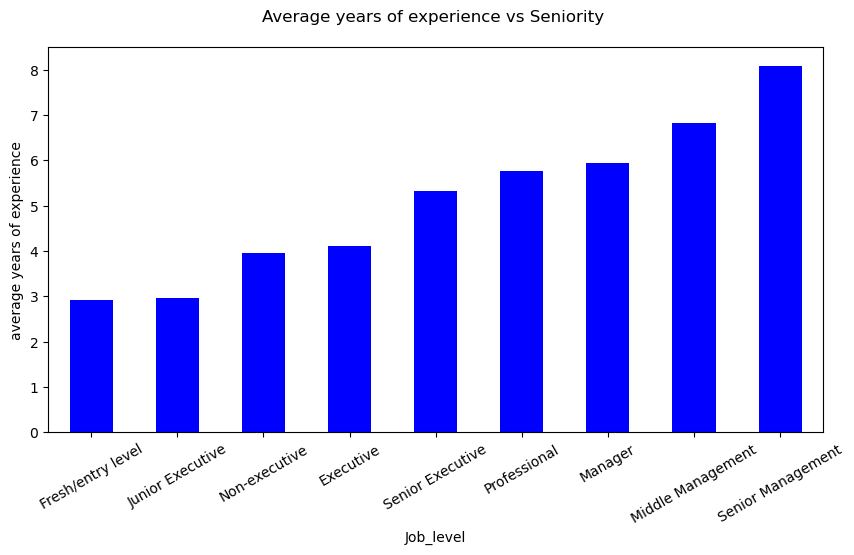

In [72]:
plt.figure(figsize=(10,5))
df.groupby('Job_level')['years_of_experience'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Average years of experience vs Seniority \n')
plt.ylabel('average years of experience')
plt.show()

In [73]:
#Seniority level cleaning

df.Job_level.value_counts() 

Professional         383
Executive            359
Manager              209
Senior Executive     170
Non-executive        159
Junior Executive     114
Fresh/entry level    105
Middle Management     80
Senior Management     56
Name: Job_level, dtype: int64

In [63]:
# for those jobs that indicate multiple seniority, will just take the first one as it displayes the most junior level accepted
df['Job_level'] = df['Job_level'].map(lambda x: x.split(',')[0])

In [64]:
df['Job_level'].unique()

array(['Executive', 'Middle Management', 'Professional',
       'Fresh/entry level', 'Manager', 'Non-executive',
       'Senior Management', 'Senior Executive', 'Junior Executive'],
      dtype=object)

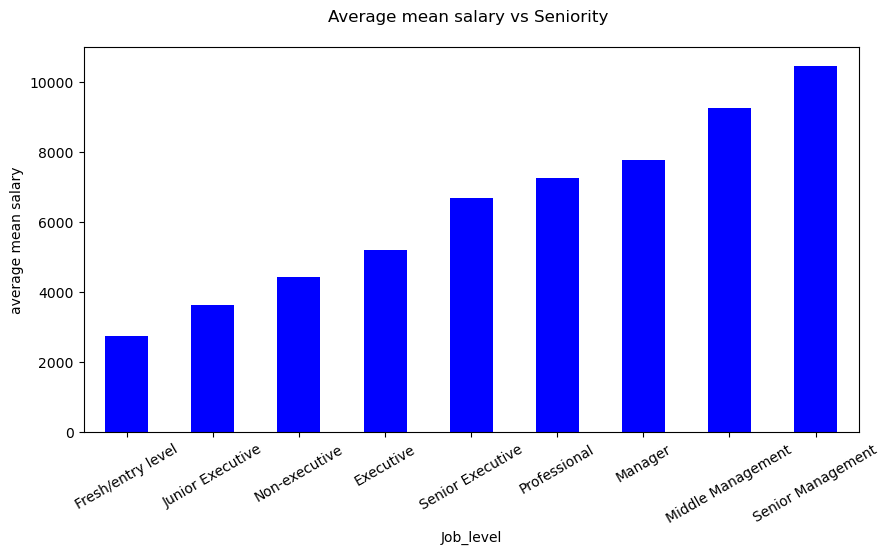

In [182]:
plt.figure(figsize=(10,5))
df.groupby('Job_level')['mean_salary'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Average mean salary vs Seniority \n')
plt.ylabel('average mean salary')
plt.show()

In [74]:
# convert job_title column to lowercase
df['job_title'] = df['job_title'].str.lower()

In [75]:
df.job_title.value_counts()

data scientist                                        26
accounts executive                                    15
research fellow                                       14
data engineer                                         13
project manager                                       11
                                                      ..
senior cloud developer                                 1
regional ocean freight fcl trade lane manager apac     1
training coordinator                                   1
assistant manager, it / av on site - 180000dg          1
country manager china, shanghai, recruitment group     1
Name: job_title, Length: 1274, dtype: int64

In [154]:
# check number of job titles that contain scientist and the percentage 
print(df['job_title'].str.contains('scientist').sum())
print(df['job_title'].str.contains('scientist').sum()/len(df))

54
0.03300733496332518


In [156]:
# check number of job titles that contain analyst and the percentage 
print(df['job_title'].str.contains('analyst').sum())
print(df['job_title'].str.contains('analyst').sum()/len(df))

129
0.07885085574572127


In [157]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('engineer').sum())
print(df['job_title'].str.contains('engineer').sum()/len(df))

300
0.18337408312958436


In [158]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('manager').sum())
print(df['job_title'].str.contains('manager').sum()/len(df))

256
0.15647921760391198


In [159]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('research').sum())
print(df['job_title'].str.contains('research').sum()/len(df))

85
0.0519559902200489


In [160]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('support').sum())
print(df['job_title'].str.contains('support').sum()/len(df))

39
0.023838630806845965


In [162]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('architect').sum())
print(df['job_title'].str.contains('architect').sum()/len(df))

32
0.019559902200488997


In [167]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('administrator').sum())
print(df['job_title'].str.contains('administrator').sum()/len(df))

28
0.017114914425427872


In [168]:
# check number of job titles that contain engineer and the percentage 
print(df['job_title'].str.contains('assistant').sum())
print(df['job_title'].str.contains('assistant').sum()/len(df))

126
0.07701711491442542


In [76]:
# for those jobs that indicate multiple seniority, will just take the first one as it displayes the most junior level accepted
df_test = df['job_title'].map(lambda x: x.split(',')[0])

In [77]:
print(df_test)

0                                       data engineer
1                                      data scientist
2       data center engineering project engineer apac
3                           lead data center engineer
4                  data scientist - intern (6 months)
                            ...                      
1632                                 scientist (artc)
1633          part time admin assistant ($10 per hour
1634        bii - senior systems and network engineer
1635                                       accountant
1636                            country manager china
Name: job_title, Length: 1635, dtype: object


In [78]:
#Extracting Education information

# List of education options
education_options = ['phd', 'masters', 'degree', 'diploma', 'nitec', 'a levels', 'o levels', 'n levels']

# Convert the 'requirement' column to lowercase
df['requirement_lower'] = df['requirement'].str.lower()

# Create a regex pattern for matching
pattern = '|'.join(education_options)

# Use str.contains to check for matches
df['education'] = df['requirement_lower'].apply(lambda x: ', '.join(re.findall(pattern, str(x))) or 'No Education Required')

# Drop the lowercase column if you no longer need it
df = df.drop(columns=['requirement_lower'])

# Display the result
print(df[['requirement', 'education']])

                                            requirement              education
0     Competencies  Degree in Computer Science or an...                 degree
1     ●  Comfortable working with large amounts of d...  No Education Required
2     Basic Qualifications -  Minimum 5 years of mis...         degree, degree
3     Required Minimum Education:  Bachelor’s Degree...                 degree
4     Education & Experience Requirements Advanced d...                 degree
...                                                 ...                    ...
1632   Ph.D. in System architecture, network design,...  No Education Required
1633  Requirements:  Minimum GCE ‘N’ level with at l...  No Education Required
1634   Diploma/Degree in relevant field 6-8 years of...        diploma, degree
1635  ~ Prepare accurate and timely financial statem...                 degree
1636   Post-graduate qualifications or Bachelor’s de...                 degree

[1635 rows x 2 columns]


In [79]:
df.head(20)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience,education
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,data engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,3.0,degree
1,PORTCAST PTE. LTD.,Full Time,data scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,7.0,No Education Required
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,data center engineering project engineer apac,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,5.0,"degree, degree"
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,lead data center engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,7.0,degree
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,data scientist - intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,3.0,degree
5,ECQUARIA TECHNOLOGIES PTE LTD,Permanent,data analyst,Middle Management,Monthly,"Identify, analyze, and interpret trends or pa...","Degree in Computer Science, Information Manag...",Central,https://www.mycareersfuture.sg/job/data-analys...,4000.0,5000.0,4500.0,7.0,degree
6,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,senior data center infrastructure availability...,Professional,Monthly,Amazon Web Service (AWS) operates 44 Availabil...,BASIC QUALIFICATIONS Bachelor’s/Diploma/certi...,Central,https://www.mycareersfuture.sg/job/senior-data...,14000.0,17000.0,15500.0,10.0,"diploma, degree, degree"
7,MACLINK PTE. LTD.,Full Time,data processing manager,Manager,Monthly,To operate computers and other communications ...,"In addition to inputting, organizing, and cata...",Central,https://www.mycareersfuture.sg/job/data-proces...,2000.0,4000.0,3000.0,6.0,No Education Required
8,DIMENSION DATA ASIA PACIFIC PTE. LTD.,Full Time,manager - transformation and apps,Manager,Monthly,This relatively new role is encompassing both ...,Skills Detailed background knowledge or hands...,East,https://www.mycareersfuture.sg/job/manager-tra...,8000.0,10000.0,9000.0,15.0,degree
9,LEADIQ SINGAPORE PTE. LTD.,Permanent,software engineer in machine learning,Professional,Monthly,Are you the type of engineer who punches juke ...,"If you join LeadIQ, you will learn a lot: In t...",Central,https://www.mycareersfuture.sg/job/software-en...,5000.0,7500.0,6250.0,6.0,No Education Required


In [80]:
df.education.value_counts()

No Education Required                        650
degree                                       551
diploma                                      107
diploma, degree                               65
degree, degree                                59
degree, diploma                               48
phd                                           26
masters, degree                               26
phd, degree                                   23
masters                                       13
nitec                                         11
degree, masters, degree                        4
degree, degree, degree                         4
phd, masters                                   4
degree, diploma, degree                        3
nitec, diploma                                 3
phd, masters, degree                           3
degree, phd                                    3
degree, masters, phd                           2
degree, masters, masters                       2
o levels            

In [81]:
df.education.isnull().sum()

0

In [82]:
# for those jobs that indicate multiple seniority, will just take the first one
df['education'] = df['education'].map(lambda x: x.split(',')[0])

In [83]:
#cleaned up education

df.education.value_counts()

degree                   685
No Education Required    650
diploma                  182
phd                       59
masters                   40
nitec                     17
o levels                   2
Name: education, dtype: int64

In [171]:
df.education.unique()

array(['degree', 'No Education Required', 'diploma', 'phd', 'nitec',
       'o levels', 'masters'], dtype=object)

In [172]:
df.Nature_of_Scope.unique()

array(['engineer', 'scientist', 'lead', 'analyst', 'manager', 'developer',
       'sales', 'consultant', 'specialist', 'General', 'administrator',
       'research', 'operations', 'management', 'accounts', 'associate',
       'strategist', 'designer', 'assistant', 'executive', 'technician',
       'architect', 'tester', 'administration', 'cloud'], dtype=object)

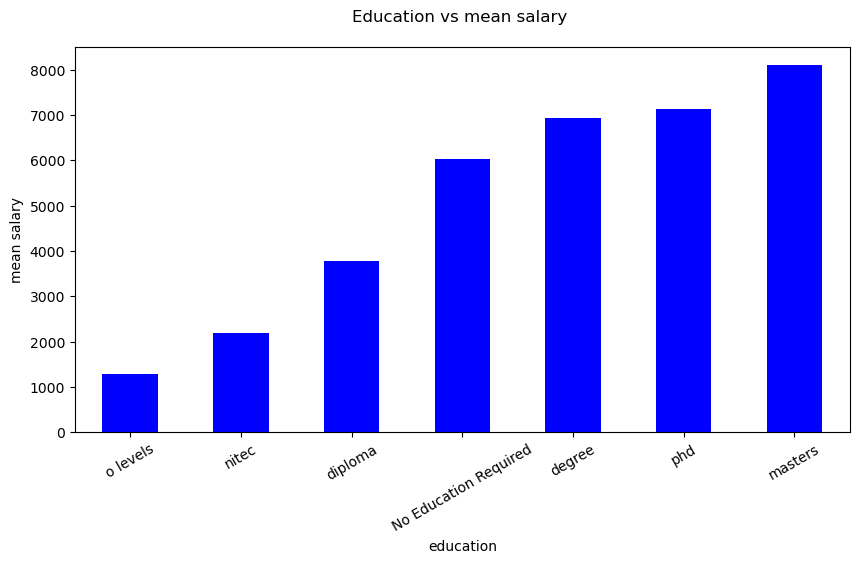

In [84]:
plt.figure(figsize=(10,5))
df.groupby('education')['mean_salary'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Education vs mean salary \n')
plt.ylabel('mean salary')
plt.show()

In [153]:
df.education.unique()

array(['degree', 'No Education Required', 'diploma', 'phd', 'nitec',
       'o levels', 'masters'], dtype=object)

In [85]:
#Job title cleaning

df.job_title.value_counts()

data scientist                                        26
accounts executive                                    15
research fellow                                       14
data engineer                                         13
project manager                                       11
                                                      ..
senior cloud developer                                 1
regional ocean freight fcl trade lane manager apac     1
training coordinator                                   1
assistant manager, it / av on site - 180000dg          1
country manager china, shanghai, recruitment group     1
Name: job_title, Length: 1274, dtype: int64

In [86]:
#Extracting Education information

# List of education options
job_titles = ['scientist','engineer','scientist','manager','administration','analyst','consultant','sales','operations','developer','research','cloud','associate', 'specialist', 'administrator','lead', 'assistant', 'strategist','designer','technician', 'executive', 'accounts', 'architect', 'tester', 'management']

# Convert the 'requirement' column to lowercase
df['job_title_lower'] = df['job_title'].str.lower()

# Create a regex pattern for matching
pattern = '|'.join(job_titles)

# Use str.contains to check for matches
df['Nature_of_Scope'] = df['job_title_lower'].apply(lambda x: ', '.join(re.findall(pattern, str(x))) or 'General')

# Drop the lowercase column if you no longer need it
df = df.drop(columns=['job_title_lower'])

# Display the result
print(df[['job_title', 'Nature_of_Scope']])

                                              job_title     Nature_of_Scope
0                                         data engineer            engineer
1                                        data scientist           scientist
2         data center engineering project engineer apac  engineer, engineer
3                             lead data center engineer      lead, engineer
4                    data scientist - intern (6 months)           scientist
...                                                 ...                 ...
1632                                   scientist (artc)           scientist
1633  part time admin assistant ($10 per hour, 5 day...           assistant
1634          bii - senior systems and network engineer            engineer
1635                                         accountant             General
1636  country manager china, shanghai, recruitment g...             manager

[1635 rows x 2 columns]


In [87]:
df.Nature_of_Scope.isnull().sum()

0

In [88]:
# for those jobs that indicate multiple nature_of_scope, will just take the first one
df['Nature_of_Scope'] = df['Nature_of_Scope'].map(lambda x: x.split(',')[0])

In [89]:
df.Nature_of_Scope.value_counts()

engineer          266
General           255
manager           192
analyst           114
assistant          93
consultant         82
executive          77
research           77
developer          65
associate          52
scientist          44
accounts           43
lead               42
sales              42
specialist         35
operations         28
architect          27
designer           24
management         24
administrator      22
technician         17
cloud               6
strategist          3
tester              3
administration      2
Name: Nature_of_Scope, dtype: int64

In [152]:
df.Nature_of_Scope.unique()

array(['engineer', 'scientist', 'lead', 'analyst', 'manager', 'developer',
       'sales', 'consultant', 'specialist', 'General', 'administrator',
       'research', 'operations', 'management', 'accounts', 'associate',
       'strategist', 'designer', 'assistant', 'executive', 'technician',
       'architect', 'tester', 'administration', 'cloud'], dtype=object)

In [90]:
df[df.Nature_of_Scope =='General'].head(20)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience,education,Nature_of_Scope
20,A*STAR RESEARCH ENTITIES,Full Time,clinical operational oversight head (eddc),Senior Management,Monthly,Job purpose Provides leadership in executing ...,PhD in Life Sciences or equivalent Approximat...,South,https://www.mycareersfuture.sg/job/clinical-op...,9000.000000,18000.0,13500.000000,8.0,phd,General
22,THE NIELSEN COMPANY (SINGAPORE) PTE. LTD.,Full Time,"client relationship owner - director, consumer...",Senior Management,Monthly,"Client Relationship Owner – Director, Consumer...",Background and Technical Skills  Strong rese...,Central,https://www.mycareersfuture.sg/job/client-rela...,10000.000000,16000.0,13000.000000,10.0,degree,General
42,ARDEX SINGAPORE PTE. LTD.,Temporary,part timer,Fresh/entry level,Monthly,- Documentation for exports shipments etc. - D...,"- Proficient in Microsoft office (Word, excel,...",West,https://www.mycareersfuture.sg/job/part-timer-...,800.000000,1000.0,900.000000,3.0,o levels,General
49,AMPLUS FIELDS CONSULTING,"Permanent, Full Time","receptionist & cinic asst, junior & senior (me...",Fresh/entry level,Monthly,"Respond to phone calls, email enquiries and a...",Singaporeans only Minimum N level Good commun...,Islandwide,https://www.mycareersfuture.sg/job/receptionis...,1800.000000,2500.0,2150.000000,3.0,No Education Required,General
51,LEGO SINGAPORE PTE. LTD.,Temporary,sr. general ledger accountant (temporary),Executive,Monthly,Are you detailed and meticulous that enjoys bu...,Do you have what it takes? At least 3-5 year...,East,https://www.mycareersfuture.sg/job/sr-general-...,3900.000000,7800.0,5850.000000,5.0,diploma,General
95,MORRISON & FOERSTER (SINGAPORE) LLP,Full Time,paralegal (corporate),Executive,Monthly,RESPONSIBILITIES: Guided by department object...,QUALIFICATIONS Education and Experience Bache...,Central,https://www.mycareersfuture.sg/job/paralegal-m...,4000.000000,10000.0,7000.000000,4.0,degree,General
111,EDUCARE HUMAN CAPITAL PRIVATE LIMITED,Temporary,school family coordinator,Non-executive,Monthly,Dazhong Primary School (i) Assist the sc...,Social Work Experience,West,https://www.mycareersfuture.sg/job/school-fami...,900.000000,1040.0,970.000000,4.0,No Education Required,General
114,STANDARD CHARTERED BANK,"Permanent, Full Time","director, group cfcc, private banking",Middle Management,Monthly,About Standard Chartered We are a leading in...,Our Ideal Candidate: Substantial experience i...,Central,https://www.mycareersfuture.sg/job/director-gr...,12500.000000,25000.0,18750.000000,7.0,No Education Required,General
118,A*STAR RESEARCH ENTITIES,"Contract, Full Time",gis - post doctoral fellows (spatial transcrip...,Non-executive,Monthly,"We are a large, well-supported multidisciplina...",Strong programming skills. Expertise in mathe...,South,https://www.mycareersfuture.sg/job/gis-post-do...,4500.000000,9000.0,6750.000000,4.0,No Education Required,General
123,CURTIN EDUCATION CENTRE PTE. LTD.,"Permanent, Full Time",student and academic services officer - attend...,Executive,Monthly,The Student and Academic Services Officer is r...,Qualifications and selection criteria: Essent...,Central,https://www.mycareersfuture.sg/job/student-aca...,2000.000000,2800.0,2400.000000,4.0,degree,General


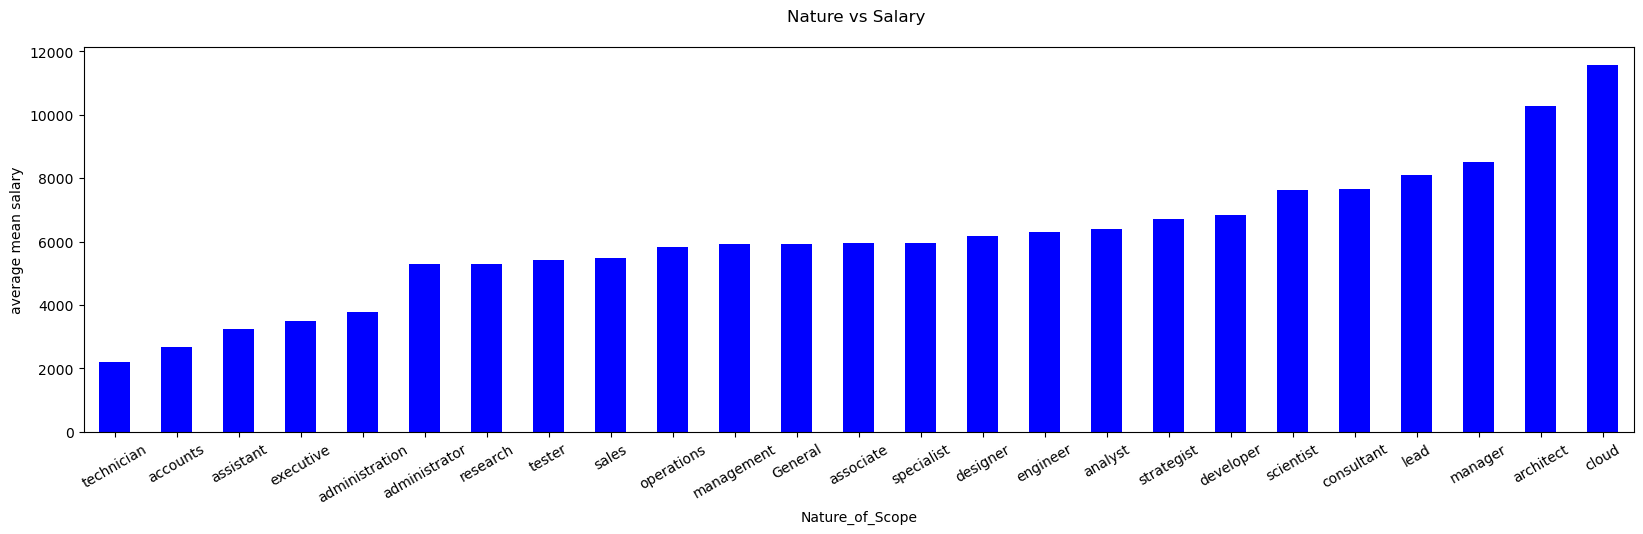

In [183]:
plt.figure(figsize=(20,5))
df.groupby('Nature_of_Scope')['mean_salary'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Nature vs Salary \n')
plt.ylabel('average mean salary')
plt.show()

In [92]:
df.corr()

/var/folders/ll/h9l4cp0s3sj93kjfbhm663g00000gn/T/ipykernel_64518/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,min_salary,max_salary,mean_salary,years_of_experience
min_salary,1.000000,0.897903,0.960804,0.528698
max_salary,0.897903,1.000000,0.984743,0.501435
mean_salary,0.960804,0.984743,1.000000,0.524801
years_of_experience,0.528698,0.501435,0.524801,1.000000


In [93]:
df.corr()['mean_salary']

/var/folders/ll/h9l4cp0s3sj93kjfbhm663g00000gn/T/ipykernel_64518/4019807398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mean_salary']


min_salary             0.960804
max_salary             0.984743
mean_salary            1.000000
years_of_experience    0.524801
Name: mean_salary, dtype: float64

/var/folders/ll/h9l4cp0s3sj93kjfbhm663g00000gn/T/ipykernel_64518/332377992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['mean_salary']],annot=True,cmap='coolwarm')


<Axes: >

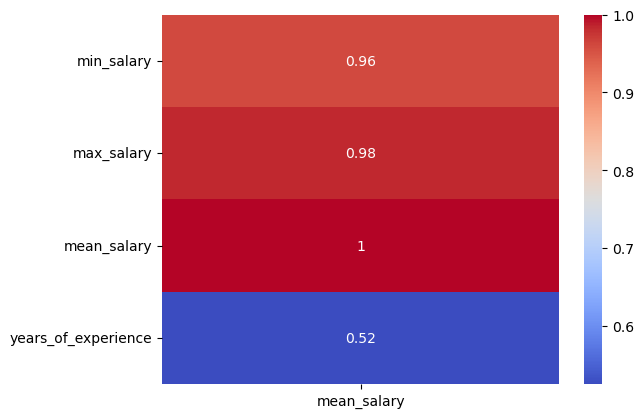

In [94]:
sns.heatmap(df.corr()[['mean_salary']],annot=True,cmap='coolwarm')

In [95]:
# for those jobs that indicate multiple nature_of_scope, will just take the first one
df['employment_type'] = df['employment_type'].map(lambda x: x.split(',')[0])

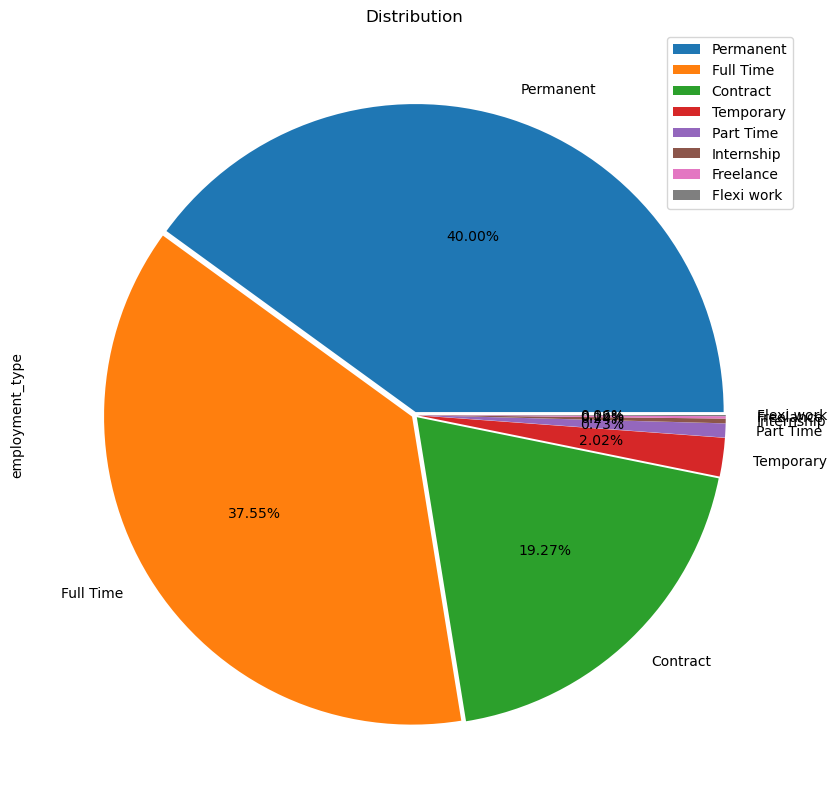

In [96]:
#colors_list = ['gold', 'lightcoral', 'lightskyblue', 'pink', 'red']
# Assuming 'employment_type' is a categorical column in your DataFrame
unique_employment_types = df['employment_type'].unique()

# Create an explode list with the same length as unique employment types
explode = [0.01] * len(unique_employment_types)

# Plot the pie chart
plt.figure(figsize=(40, 10))
df['employment_type'].value_counts().plot(kind='pie', autopct="%.2f%%", explode=explode)
plt.legend()
plt.title("Distribution")
plt.show()

In [97]:
df.head(5)

,Company,employment_type,job_title,Job_level,salary_type,job_description,requirement,location,urls,min_salary,max_salary,mean_salary,years_of_experience,education,Nature_of_Scope
0,MONEYSMART SINGAPORE PTE. LTD.,Full Time,data engineer,Executive,Monthly,Mission As part of becoming one of the members...,Competencies Degree in Computer Science or an...,South,https://www.mycareersfuture.sg/job/data-engine...,5000.0,7000.0,6000.0,3.0,degree,engineer
1,PORTCAST PTE. LTD.,Full Time,data scientist,Middle Management,Monthly,"In this role, you will be responsible for anal...",● Comfortable working with large amounts of d...,South,https://www.mycareersfuture.sg/job/data-scient...,2200.0,6000.0,4100.0,7.0,No Education Required,scientist
2,AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED,Full Time,data center engineering project engineer apac,Professional,Monthly,The Data Center Global Services (DCGS) team is...,Basic Qualifications - Minimum 5 years of mis...,Central,https://www.mycareersfuture.sg/job/data-center...,9000.0,12000.0,10500.0,5.0,degree,engineer
3,JOHNSON & JOHNSON PTE. LTD.,Permanent,lead data center engineer,Professional,Monthly,The role of Lead Data Center Engineer is owner...,Required Minimum Education: Bachelor’s Degree...,Central,https://www.mycareersfuture.sg/job/lead-data-c...,5000.0,10000.0,7500.0,7.0,degree,lead
4,JABIL CIRCUIT (SINGAPORE) PTE. LTD.,Internship,data scientist - intern (6 months),Fresh/entry level,Monthly,Essential Duties & Responsibilities Analyse ra...,Education & Experience Requirements Advanced d...,East,https://www.mycareersfuture.sg/job/data-scient...,800.0,1500.0,1150.0,3.0,degree,scientist


In [98]:
#Location clean up

df.location.value_counts()

Central                 607
South                   283
East                    246
West                    196
Islandwide              174
North                    97
East, Central            10
South, Central            9
South, East, Central      4
North, Central            3
North, East               2
West, Central             2
South, East               1
North, West               1
Name: location, dtype: int64

In [99]:
#Check if there are any nulls

df.location.isnull().sum()

0

In [100]:
# for those jobs that indicate multiple seniority, will just take the first one
df['location'] = df['location'].map(lambda x: x.split(',')[0])

In [101]:
df.location.value_counts()

Central       607
South         297
East          256
West          198
Islandwide    174
North         103
Name: location, dtype: int64

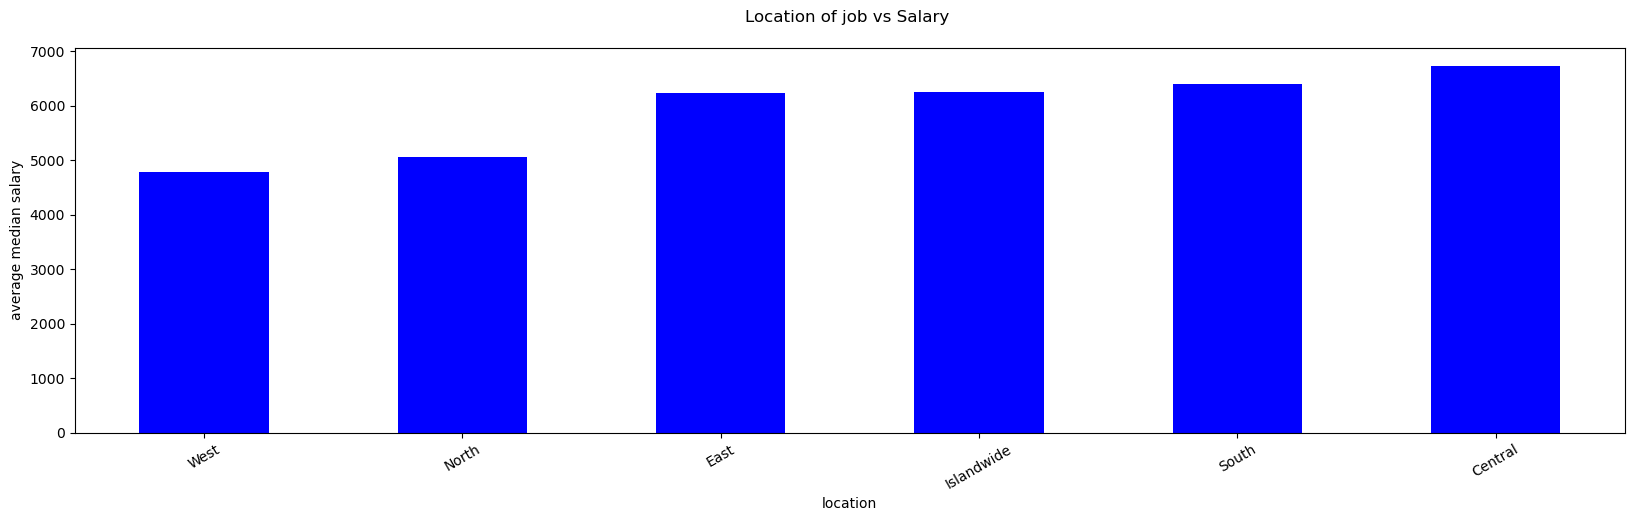

In [102]:
#Finding the mean salary by location

plt.figure(figsize=(20,5))
df.groupby('location')['mean_salary'].mean().sort_values().plot(kind='bar',
                                                      legend=False, rot= 30, colormap='winter')
plt.title('Location of job vs Salary \n')
plt.ylabel('average median salary')
plt.show()

In [146]:
import pandas as pd

# Assuming df is your DataFrame

# Group by company and count the number of job postings
company_counts = df['Company'].value_counts()

# Get the top 10 companies
top_10_companies = company_counts.head(10)

# Display the top 10 companies and their job posting counts
print("Top 10 Companies Hiring:")
print(top_10_companies)


Top 10 Companies Hiring:
Company Undisclosed                      158
NATIONAL UNIVERSITY OF SINGAPORE          35
A*STAR RESEARCH ENTITIES                  28
NANYANG TECHNOLOGICAL UNIVERSITY          26
THE SUPREME HR ADVISORY PTE. LTD.         25
ERNST & YOUNG ADVISORY PTE. LTD.          24
GOOGLE ASIA PACIFIC PTE. LTD.             20
DBS BANK LTD.                             18
MACHSPEED HUMAN RESOURCES PTE. LTD.       18
OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD     17
Name: Company, dtype: int64


In [195]:
#Multi-linear regression 

# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

scores=cross_val_score(model,X_train,y_train,cv=5)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

model_score = scores.mean()

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')

print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')

print(f'Score: {model_score}')

Training Set Mean Squared Error: 6282526.9255759055
Training Set R-squared: 0.4768692112639815
Testing Set Mean Squared Error: 4583606.761330798
Testing Set R-squared: 0.5099791327675747
Score: 0.4161557142981815


In [104]:
#Applying Ridge to understand the coefficients (influence of features)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression # New Methods

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [105]:
ridge.score(X_train,y_train)

0.4759738634165873

In [106]:
ridge_pd = pd.DataFrame({"Feature":features.columns, "Coefficient":ridge.coef_})

In [107]:
ridge_pd

,Feature,Coefficient
0,years_of_experience,532.266476
1,Job_level_Fresh/entry level,-956.945630
2,Job_level_Junior Executive,-553.133916
3,Job_level_Manager,894.488447
4,Job_level_Middle Management,1991.059833
5,Job_level_Non-executive,-310.689374
6,Job_level_Professional,890.190804
7,Job_level_Senior Executive,723.810608
8,Job_level_Senior Management,2708.545420
9,Nature_of_Scope_accounts,-1444.643064


In [108]:
#Lasso method

lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)

Lasso()

In [109]:
lasso.score(X_train,y_train)

0.4763918312070571

In [110]:
lasso_pd = pd.DataFrame({"Feature":features.columns, "Coefficent":lasso.coef_})

In [111]:
lasso_pd

,Feature,Coefficent
0,years_of_experience,1.056775e+03
1,Job_level_Fresh/entry level,-9.349008e+02
2,Job_level_Junior Executive,-5.335852e+02
3,Job_level_Manager,9.047842e+02
4,Job_level_Middle Management,2.016869e+03
5,Job_level_Non-executive,-2.946549e+02
6,Job_level_Professional,9.012227e+02
7,Job_level_Senior Executive,7.305838e+02
8,Job_level_Senior Management,2.767235e+03
9,Nature_of_Scope_accounts,-1.441899e+03


In [112]:
#Random Forest model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Exclude the 'company' column if it's in your dataset
if 'company' in features.columns:
    features = features.drop(['company'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')

print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')

Training Set Mean Squared Error: 1613678.0440194537
Training Set R-squared: 0.8656329407045861
Testing Set Mean Squared Error: 5948690.932737777
Testing Set R-squared: 0.3640417161546603


In [113]:
#Finding the best parameters for the Random Forest model

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best parameters to create the final model
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')

print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Training Set Mean Squared Error: 5269395.904150429
Training Set R-squared: 0.5612301756672742
Testing Set Mean Squared Error: 4960605.241598423
Testing Set R-squared: 0.46967525595934456


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level','Nature_of_Scope','education', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level','Nature_of_Scope', 'education']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Exclude the 'company' column if it's in your dataset
if 'company' in features.columns:
    features = features.drop(['company'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Perform a manual search for hyperparameters
best_mse_test = float('inf')
best_params = {}

for max_depth in [50, 100, 150]:
    for min_samples_leaf in [2, 4, 6]:
        for min_samples_split in [2, 4, 8]:
            # Create and fit the Random Forest model
            model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
            model.fit(X_train, y_train)

            # Make predictions
            y_test_pred = model.predict(X_test)

            # Evaluate the model
            mse_test = mean_squared_error(y_test, y_test_pred)

            # Check if the current set of hyperparameters is the best
            if mse_test < best_mse_test:
                best_mse_test = mse_test
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf,
                    'min_samples_split': min_samples_split
                }

# Use the best parameters to create the final model
final_model = RandomForestRegressor(n_estimators=100, random_state=42, **best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')
print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')


Best Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 6, 'min_samples_split': 2}
Training Set Mean Squared Error: 5921369.675151436
Training Set R-squared: 0.5069419000897386
Testing Set Mean Squared Error: 4878111.569576415
Testing Set R-squared: 0.47849442889678795


In [115]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [15],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best parameters to create the final model
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions and evaluate the model as before


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(max_depth=15, min_samples_leaf=4, n_estimators=50,
                      random_state=42)

In [117]:
#Finding the best parameters for the Random Forest model

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [5,10,15,20],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best parameters to create the final model
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')

print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Training Set Mean Squared Error: 5269395.904150429
Training Set R-squared: 0.5612301756672742
Testing Set Mean Squared Error: 4960605.241598423
Testing Set R-squared: 0.46967525595934456


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best parameters to create the final model
final_model = RandomForestRegressor(**best_params, random_state=42)

# Perform cross-validation with the final model
cv_scores = cross_val_score(final_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Calculate mean cross-validated MSE
mean_cv_mse = -cv_scores.mean()

# Train the final model on the entire training set
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Cross-Validated Mean Squared Error: {mean_cv_mse}')
print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')
print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Cross-Validated Mean Squared Error: 7036650.739686497
Training Set Mean Squared Error: 5269395.904150429
Training Set R-squared: 0.5612301756672742
Testing Set Mean Squared Error: 4960605.241598423
Testing Set R-squared: 0.46967525595934456


In [119]:
pip install tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


In [120]:
#ANN Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type']
df_dummies = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Exclude the 'company' column if it's in your dataset
if 'company' in features.columns:
    features = features.drop(['company'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')

print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')


2023-12-20 00:49:04.798496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
41/41 [==============================] - 1s 9ms/step - loss: 51021404.0000 - val_loss: 45262940.0000
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 50738228.0000 - val_loss: 44704536.0000
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 49619180.0000 - val_loss: 42921628.0000
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 46822192.0000 - val_loss: 39174016.0000
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 41765376.0000 - val_loss: 33192494.0000
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 34550060.0000 - val_loss: 25472974.0000
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 26142738.0000 - val_loss: 17710458.0000
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 18430004.0000 - val_loss: 11744920.0000
Epoch 9/50
41/41 [==============================] - 0s 3ms/step - loss: 13038028.0000 - val_loss: 858105

In [342]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [121]:
#SVR model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Assuming df is your dataset with features and target variable

# Select features and target variable
features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']
target = 'mean_salary'

# Separate features and target variable
X = df[features]
y = df[target]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type'], drop_first=True)
X_final_encoded = pd.concat([X_encoded,df['years_of_experience']],axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr = SVR(kernel='linear')  # You can experiment with different kernels: linear, rbf, poly, etc.

# Fit the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_var}')


Mean Squared Error (MSE): 5622944.7505072495
R-squared (R2): 0.39886634990398084
Explained Variance Score: 0.41776418406826155


In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Assuming df is your dataset with features and target variable

# Select features and target variable
features = ['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type', 'years_of_experience']
target = 'mean_salary'

# Separate features and target variable
X = df[features]
y = df[target]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Job_level', 'Nature_of_Scope', 'education', 'location', 'employment_type'], drop_first=True)
X_final_encoded = pd.concat([X_encoded,df['years_of_experience']],axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr = SVR()

# Define the parameter grid for the grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'], 
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon in the epsilon-SVR model
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best parameters to create the final SVR model
final_svr_model = SVR(**best_params)

# Fit the final model
final_svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_svr_model.predict(X_test_scaled)

# Evaluate the final model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_var}')


Best Hyperparameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
Mean Squared Error (MSE): 4709351.854531065
R-squared (R2): 0.49653606864173194
Explained Variance Score: 0.5024508696419834


In [ ]:
# How to improve multi-linear regression
# Lasso - Give the right features. 

#RandomForest
#gridsearchcv Random forest - https://colab.research.google.com/drive/1sVo0MtQjNQ2xwgLnRSzSD-D2hszhb3Qb?usp=sharing

#SVR 
#gridsearchcv SVR - https://colab.research.google.com/drive/1sVo0MtQjNQ2xwgLnRSzSD-D2hszhb3Qb?usp=sharing

#ANN
#Refer to his workbook - https://colab.research.google.com/drive/1HWVFF6KkoPYRAE-oeAeNX6lUCdM2mf_6?usp=sharing

#Deployment part which you want to see

#pickle, generate a number.

# Final code - https://colab.research.google.com/drive/11ZUHVvAOLlkllMlSEsJ0JFmR32881Gzq?usp=sharing

#Present the fit model which is the training and testing

In [124]:
#Wordcloud

df.Nature_of_Scope.value_counts()

engineer          266
General           255
manager           192
analyst           114
assistant          93
consultant         82
executive          77
research           77
developer          65
associate          52
scientist          44
accounts           43
lead               42
sales              42
specialist         35
operations         28
architect          27
designer           24
management         24
administrator      22
technician         17
cloud               6
strategist          3
tester              3
administration      2
Name: Nature_of_Scope, dtype: int64

In [127]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [129]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [141]:
import nltk

nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

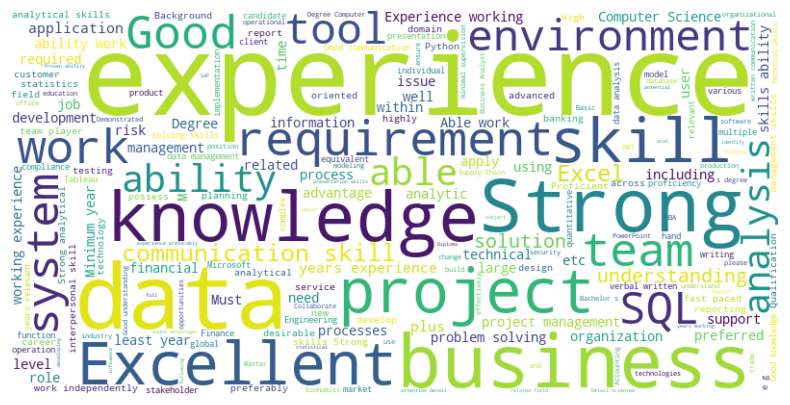

In [133]:
#Wordcloud of requirements relating to Data Analyst role

import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter rows where 'Nature_of_Scope' is 'analyst'
analyst_rows = df[df['Nature_of_Scope'] == 'analyst']

# Combine all descriptions into a single string
analyst_text = ' '.join(analyst_rows['requirement'].astype(str))

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Remove common stopwords
filtered_analyst_text = ' '.join(word for word in analyst_text.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_analyst_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


experience: 187
skills: 172
data: 109
work: 94
Experience: 91
years: 86
Strong: 69
business: 60
management: 59
ability: 58


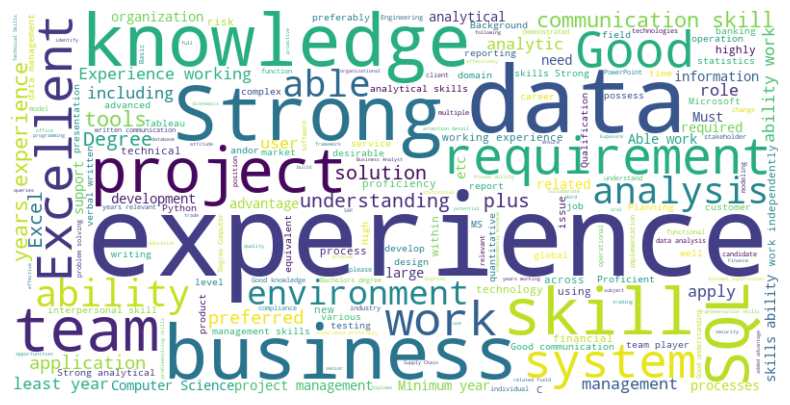

In [138]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import re  # Import the regular expression module
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter rows where 'Nature_of_Scope' is 'analyst'
analyst_rows = df[df['Nature_of_Scope'] == 'analyst']

# Combine all requirements into a single string
analyst_requirements_text = ' '.join(analyst_rows['requirement'].astype(str))

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Remove common stopwords
filtered_analyst_requirements_text = ' '.join(word for word in analyst_requirements_text.split() if word.lower() not in stop_words)

# Remove symbols and non-alphabetic characters using regular expression
filtered_analyst_requirements_text = re.sub(r'[^a-zA-Z\s]', '', filtered_analyst_requirements_text)

# Tokenize the text into words
words = filtered_analyst_requirements_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the top 10 words and their counts
for word, count in top_10_words:
    print(f'{word}: {count}')

# Generate the word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_analyst_requirements_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


experience: 185
skills: 172
data: 109
work: 94
Experience: 91
years: 86
Strong: 65
business: 60
management: 59
ability: 58


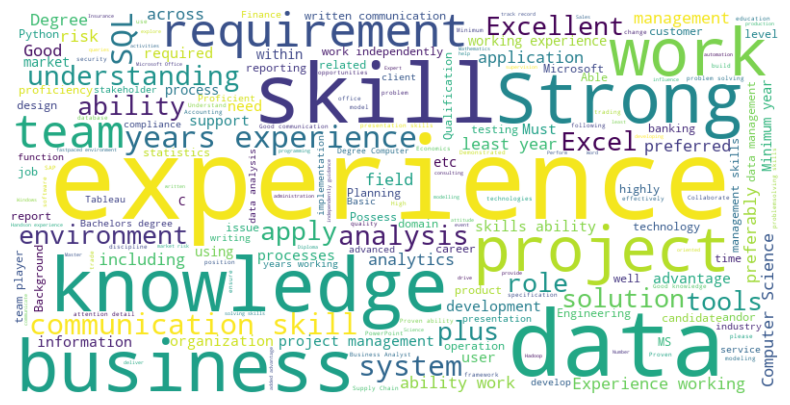

In [142]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import pos_tag
from collections import Counter
import re
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter rows where 'Nature_of_Scope' is 'analyst'
analyst_rows = df[df['Nature_of_Scope'] == 'analyst']

# Combine all requirements into a single string
analyst_requirements_text = ' '.join(analyst_rows['requirement'].astype(str))

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Remove common stopwords
filtered_analyst_requirements_text = ' '.join(word for word in analyst_requirements_text.split() if word.lower() not in stop_words)

# Remove symbols and non-alphabetic characters using regular expression
filtered_analyst_requirements_text = re.sub(r'[^a-zA-Z\s]', '', filtered_analyst_requirements_text)

# Tokenize the text into words
words = filtered_analyst_requirements_text.split()

# Perform part-of-speech tagging
pos_tags = pos_tag(words)

# Filter out adjectives (JJ and JJR are adjective tags)
filtered_words = [word for word, pos in pos_tags if pos not in ['JJ', 'JJR']]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the top 10 words and their counts
for word, count in top_10_words:
    print(f'{word}: {count}')

# Generate the word cloud for visualization
filtered_analyst_requirements_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_analyst_requirements_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

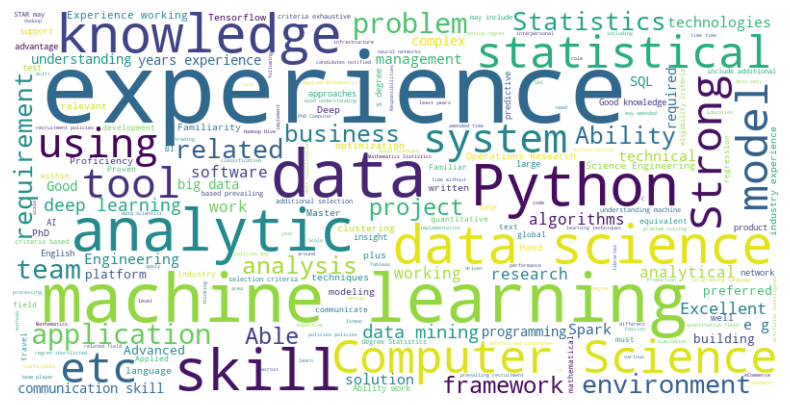

In [134]:
#Wordcloud of requirements relating to Data Scientist role

import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter rows where 'Nature_of_Scope' is 'analyst'
analyst_rows = df[df['Nature_of_Scope'] == 'scientist']

# Combine all descriptions into a single string
analyst_text = ' '.join(analyst_rows['requirement'].astype(str))

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Remove common stopwords
filtered_analyst_text = ' '.join(word for word in analyst_text.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_analyst_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

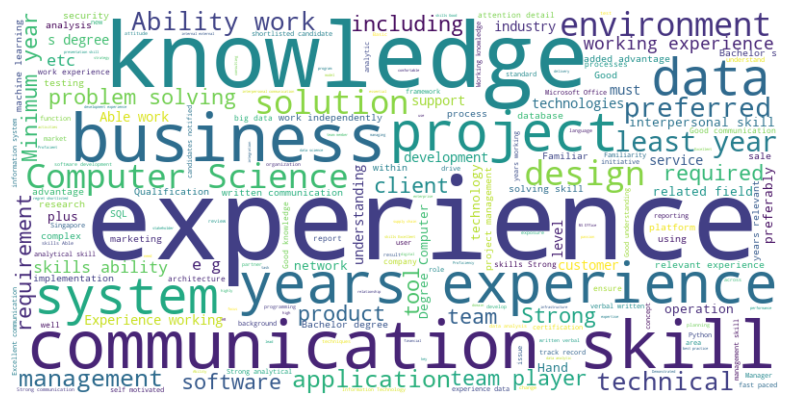

In [131]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a "description" column
# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Combine all descriptions into a single string
text = ' '.join(df['requirement'].astype(str))

# Remove common stopwords
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


data: 93
experience: 86
Experience: 62
learning: 49
skills: 40
machine: 35
years: 29
etc: 28
analytics: 27
Science: 26


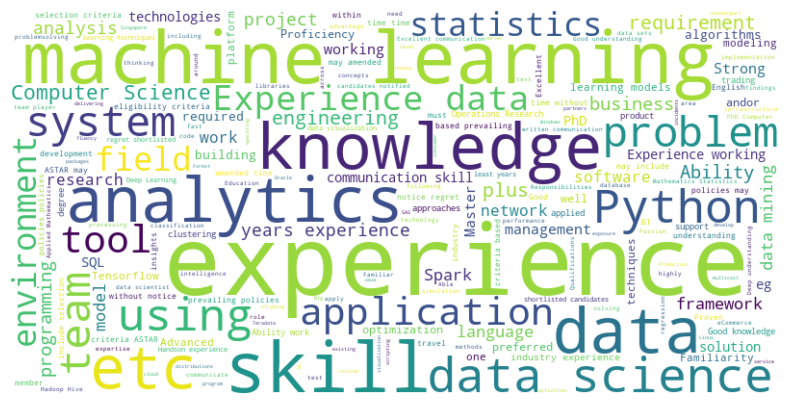

In [143]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import pos_tag
from collections import Counter
import re
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter rows where 'Nature_of_Scope' is 'analyst'
analyst_rows = df[df['Nature_of_Scope'] == 'scientist']

# Combine all requirements into a single string
analyst_requirements_text = ' '.join(analyst_rows['requirement'].astype(str))

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Remove common stopwords
filtered_analyst_requirements_text = ' '.join(word for word in analyst_requirements_text.split() if word.lower() not in stop_words)

# Remove symbols and non-alphabetic characters using regular expression
filtered_analyst_requirements_text = re.sub(r'[^a-zA-Z\s]', '', filtered_analyst_requirements_text)

# Tokenize the text into words
words = filtered_analyst_requirements_text.split()

# Perform part-of-speech tagging
pos_tags = pos_tag(words)

# Filter out adjectives (JJ and JJR are adjective tags)
filtered_words = [word for word, pos in pos_tags if pos not in ['JJ', 'JJR']]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the top 10 words and their counts
for word, count in top_10_words:
    print(f'{word}: {count}')

# Generate the word cloud for visualization
filtered_analyst_requirements_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_analyst_requirements_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [174]:
#Deployment and creation of a pickle file

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming df is your dataset
# Select features and target variable
features = df[['Job_level','Nature_of_Scope','education', 'years_of_experience']]
target = df['mean_salary']

# Convert categorical features to dummy variables
categorical_features = ['Job_level','Nature_of_Scope', 'education']
df_dummies = pd.get_dummies(features[categorical_features], columns=categorical_features, drop_first=True)

# Combine dummy variables with numerical feature
features = pd.concat([df_dummies, features['years_of_experience']], axis=1)

# Exclude the 'company' column if it's in your dataset
if 'company' in features.columns:
    features = features.drop(['company'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical feature
scaler = StandardScaler()
X_train['years_of_experience'] = scaler.fit_transform(X_train[['years_of_experience']])
X_test['years_of_experience'] = scaler.transform(X_test[['years_of_experience']])

# Perform a manual search for hyperparameters
best_mse_test = float('inf')
best_params = {}

for max_depth in [50, 100, 150]:
    for min_samples_leaf in [2, 4, 6]:
        for min_samples_split in [2, 4, 8]:
            # Create and fit the Random Forest model
            model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
            model.fit(X_train, y_train)

            # Make predictions
            y_test_pred = model.predict(X_test)

            # Evaluate the model
            mse_test = mean_squared_error(y_test, y_test_pred)

            # Check if the current set of hyperparameters is the best
            if mse_test < best_mse_test:
                best_mse_test = mse_test
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf,
                    'min_samples_split': min_samples_split
                }

# Use the best parameters to create the final model
final_model = RandomForestRegressor(n_estimators=100, random_state=42, **best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Training Set Mean Squared Error: {mse_train}')
print(f'Training Set R-squared: {r2_train}')
print(f'Testing Set Mean Squared Error: {mse_test}')
print(f'Testing Set R-squared: {r2_test}')

# Save the trained Random Forest model to a file using pickle
model_filename = 'capstone_employment.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Save the trained scaler as a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
print(f'Model saved to {model_filename}')

Best Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 6, 'min_samples_split': 2}
Training Set Mean Squared Error: 5921582.420180122
Training Set R-squared: 0.5069241853268772
Testing Set Mean Squared Error: 4877990.574270781
Testing Set R-squared: 0.478507364174111
Model saved to capstone_employment.pkl


In [175]:
features.columns

Index(['Job_level_Fresh/entry level', 'Job_level_Junior Executive',
       'Job_level_Manager', 'Job_level_Middle Management',
       'Job_level_Non-executive', 'Job_level_Professional',
       'Job_level_Senior Executive', 'Job_level_Senior Management',
       'Nature_of_Scope_accounts', 'Nature_of_Scope_administration',
       'Nature_of_Scope_administrator', 'Nature_of_Scope_analyst',
       'Nature_of_Scope_architect', 'Nature_of_Scope_assistant',
       'Nature_of_Scope_associate', 'Nature_of_Scope_cloud',
       'Nature_of_Scope_consultant', 'Nature_of_Scope_designer',
       'Nature_of_Scope_developer', 'Nature_of_Scope_engineer',
       'Nature_of_Scope_executive', 'Nature_of_Scope_lead',
       'Nature_of_Scope_management', 'Nature_of_Scope_manager',
       'Nature_of_Scope_operations', 'Nature_of_Scope_research',
       'Nature_of_Scope_sales', 'Nature_of_Scope_scientist',
       'Nature_of_Scope_specialist', 'Nature_of_Scope_strategist',
       'Nature_of_Scope_technician', 

In [178]:
print("Feature names during training:", X_train.columns)

Feature names during training: Index(['Job_level_Fresh/entry level', 'Job_level_Junior Executive',
       'Job_level_Manager', 'Job_level_Middle Management',
       'Job_level_Non-executive', 'Job_level_Professional',
       'Job_level_Senior Executive', 'Job_level_Senior Management',
       'Nature_of_Scope_accounts', 'Nature_of_Scope_administration',
       'Nature_of_Scope_administrator', 'Nature_of_Scope_analyst',
       'Nature_of_Scope_architect', 'Nature_of_Scope_assistant',
       'Nature_of_Scope_associate', 'Nature_of_Scope_cloud',
       'Nature_of_Scope_consultant', 'Nature_of_Scope_designer',
       'Nature_of_Scope_developer', 'Nature_of_Scope_engineer',
       'Nature_of_Scope_executive', 'Nature_of_Scope_lead',
       'Nature_of_Scope_management', 'Nature_of_Scope_manager',
       'Nature_of_Scope_operations', 'Nature_of_Scope_research',
       'Nature_of_Scope_sales', 'Nature_of_Scope_scientist',
       'Nature_of_Scope_specialist', 'Nature_of_Scope_strategist',
      

In [149]:
#Install tk for dropdown functions

pip install tk

Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install streamlit pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [167]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model
model_filename = 'capstone_employment.pkl'
with open(model_filename, 'rb') as model_file:
    model = pickle.load(model_file)

# Function to preprocess input data
def preprocess_input_data(input_data):
    # Assuming input_data is a dictionary containing user input
    features = pd.DataFrame(input_data, index=[0])

    # Convert categorical features to dummy variables
    categorical_features = ['Job_level', 'Nature_of_Scope', 'education']
    df_dummies = pd.get_dummies(features[categorical_features], drop_first=True)
    features = pd.concat([df_dummies, features[['years_of_experience']]], axis=1)

    # Standardize the numerical feature
    features['years_of_experience'] = scaler.transform(features[['years_of_experience']])

    return features

# Streamlit app
st.title('Salary Prediction App')

# User input form
job_level = st.selectbox('Job Level', ['Junior', 'Mid', 'Senior'])
nature_of_scope = st.selectbox('Nature of Scope', ['Technical', 'Management', 'Business'])
education = st.selectbox('Education', ['Bachelor', 'Master', 'PhD'])
years_of_experience = st.slider('Years of Experience', min_value=0, max_value=20, value=5)

# Make predictions when the user clicks the "Predict" button
if st.button('Predict'):
    # Create input data dictionary
    input_data = {
        'Job_level': job_level,
        'Nature_of_Scope': nature_of_scope,
        'education': education,
        'years_of_experience': years_of_experience
    }

    # Preprocess input data
    input_features = preprocess_input_data(input_data)

    # Make prediction
    prediction = model.predict(input_features)

    # Display the prediction
    st.success(f'Predicted Salary: ${prediction[0]:,.2f}')